# 顔に自動でモザイクをかける

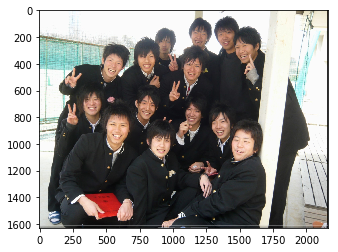

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('keiko.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
img

array([[[179, 179, 179],
        [179, 179, 179],
        [179, 179, 179],
        ...,
        [  0,   0,   1],
        [  0,   0,   1],
        [  0,   0,   1]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [  0,   0,   1],
        [  0,   0,   1],
        [  0,   0,   1]],

       [[231, 231, 231],
        [231, 231, 231],
        [231, 231, 231],
        ...,
        [  0,   0,   1],
        [  0,   0,   1],
        [  0,   0,   1]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  2,   2,   2],
        [  2,   2,   2],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

## 顔検出の手順を確認

顔の座標= 1264 768 183 183
顔の座標= 303 597 185 185
顔の座標= 491 782 199 199
顔の座標= 723 631 178 178
顔の座標= 722 282 175 175
顔の座標= 1065 681 174 174
顔の座標= 1062 346 178 178
顔の座標= 1414 900 201 201
顔の座標= 826 902 186 186


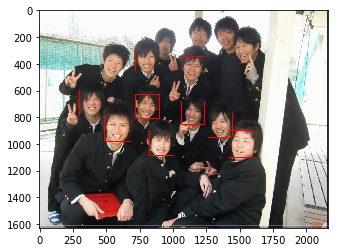

In [3]:
'''
(1)カスケードファイルを指定して検出器を作成
(2)対象画像を読み込んで、グレースケールに変換
(3)顔検出を実行する
'''

import cv2
import matplotlib.pyplot as plt

#カスケードファイルを指定して検出器を作成
cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

#画像を読み込んでグレイスケールに変換する
img = cv2.imread('keiko.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#顔認識を実行
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
#結果を確認
if len(face_list) == 0:
    print('失敗')
    quit()
#認識した部分に印をつける
for (x, y, w, h) in face_list:
    print('顔の座標=', x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=2) #赤い枠を描画

#画像を出力
cv2.imwrite('face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 顔に自動でモザイクをかける

### モザイクをかけるモジュールを作成

In [1]:
# import cv2

# def mosaic(img, rect, size):
#     #モザイクをかける領域を取得
#     (x1, x2, y1, y2) = rect
#     w = x2 - x1
#     h = y2 - y1
#     i_rect = img[y1:y2, x1:x2]

#     #一度縮小して拡大する
#     i_small = cv2.resize(i_rect, (size, size))
#     i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    
#     #画像にモザイク画像を重ねる
#     img2 = img.copy()
#     img2[y1:y2, x1:x2] = i_mos
#     return img2

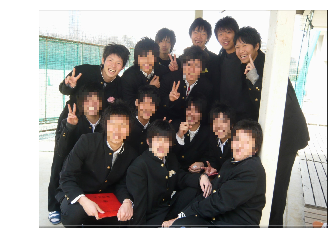

In [4]:
import cv2
import matplotlib.pyplot as plt
from module_mosaic import mosaic as mosaic

#カスケードファイルを指定して分類器を作成
cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

#画像を読み込んでグレイスケールに変換する
img = cv2.imread('keiko.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#顔認識を実行
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
#結果を確認
if len(face_list) == 0:
    print('失敗')
    quit()
#認識した部分にモザイクをかける
for (x, y, w, h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

#画像を出力
cv2.imwrite('face-detect.png', img)
plt.axis('OFF')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 手書き数字を判定

In [ ]:
"""
データセットを用意
"""

import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()


In [ ]:
print(digits.DESCR)

In [ ]:
#データを15個抽出してみる
for i in range(15):
    plt.subplot(3, 5 , i+1)
    plt.axis('off')
    plt.title(digits.target[i])
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

In [ ]:
#画像とそのピクセル
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.show()
print(d0)

## 画像を学習する

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

#データを読み込む
digits = datasets.load_digits()
X = digits.images
y = digits.target
X = X.reshape((-1, 64))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf = svm.LinearSVC()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

# 輪郭抽出

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 画像を読み込んでリサイズ --- (*1)
img = cv2.imread("flower.jpg")
img = cv2.resize(img, (300, 169))

# 色空間を二値化 --- (*2)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0) 
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

# 画面左側に二値化した画像を描画 --- (*3)
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

# 輪郭を抽出 --- (*4)
cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[1]
# 抽出した枠を描画 --- (*5)
for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    # 大きすぎたり小さすぎたり領域を除去
    if w < 30 or w > 200: continue
    print(x,y,w,h) # 結果を出力
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 画面右側に抽出結果を描画 --- (*6)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.png", dpi=200)
plt.show()



# 動画分析
jupyter notebookで実行するのではなくてコマンドラインから実行する

In [ ]:
"""
カメラで動画をとるコード
"""

import numpy as np
import cv2

#カメラからの入力開始
cap = cv2.VideoCapture(0)

while True:
    #カメラからの画像を受け取る
    _, frame = cap.read()

    #画像を縮小表示する
    frame = cv2.resize(frame, (500, 300))

    #ウィンドウに画像を出力
    cv2.imshow('OpenCV Web Camera', frame)

    #ESCかEnterキーを押したらループ抜ける
    k = cv2.waitKey(1)
    if k == 27 or k == 13:
        break

#カメラ解放、ウィンドウ放棄
cap.release()
cv2.destroyAllWindows()

In [ ]:
"""
カメラ画像から赤色っぽい部分を取り出して白色で表示するコード
"""

import numpy as np
import cv2

#カメラからの入力開始
cap = cv2.VideoCapture(0)

while True:
    #カメラからの画像を受け取る
    _, frame = cap.read()

    #画像を縮小表示する
    frame = cv2.resize(frame, (500, 300))

    #色空間をHSVに変換
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV_FULL)

    #HSVを分割
    h = hsv[:, :, 0]
    s = hsv[:, :, 1]
    v = hsv[:, :, 2]

    #赤っぽい色を持つ画素だけを抽出
    img = np.zeros(h.shape, dtype=np.uint8)
    img[((h<50)|(h>200))&(s>100)] = 255

    #ウィンドウに画像を出力
    cv2.imshow('OpenCV Web Camera', img)

    #ESCかEnterキーを押したらループ抜ける
    k = cv2.waitKey(1)
    if k == 27 or k == 13:
        break

#カメラ解放、ウィンドウ放棄
cap.release()
cv2.destroyAllWindows()

In [ ]:
"""
動きがあった部分を検出するコード
"""

import cv2

#カメラからの入力開始
cap = cv2.VideoCapture(0)
img_last = None #前回の画像を記憶する変数
green = (0, 255, 0)

while True:
    #カメラからの画像を受け取る
    _, frame = cap.read()

    #画像を縮小表示する
    frame = cv2.resize(frame, (500, 300))

    #白黒画像に変換
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (9, 9), 0)
    im_b = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]

    #差分確認
    if img_last is None:
        img_last = im_b
        continue
    frame_diff = cv2.absdiff(img_last, im_b)
    cnts =cv2.findContours(frame_diff,
                          cv2.RETR_EXTERNAL,
                          cv2.CHAIN_APPROX_SIMPLE)[1]

    #差分があった点を画面に描く
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        if w < 30: continue
        cv2.rectangle(frame, (x, y), (x+w, y+h), green, 2)

    #今回のフレームを保存
    img_last = im_b

    #ウィンドウに画像を出力
    cv2.imshow('Diff Camera', frame)
    cv2.imshow('diff data', frame_diff)

    #Enterキーを押したらループ抜ける
    k = cv2.waitKey(1)
    if k == 13:
        break

#カメラ解放、ウィンドウ放棄
cap.release()
cv2.destroyAllWindows()